In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


%matplotlib inline

In [10]:
gold_dataset = pd.read_csv(r"C:\Users\Siddhant\Desktop\gld_price_data.csv")
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [12]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [13]:
gold_dataset.shape

(2290, 6)

In [14]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [15]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [16]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


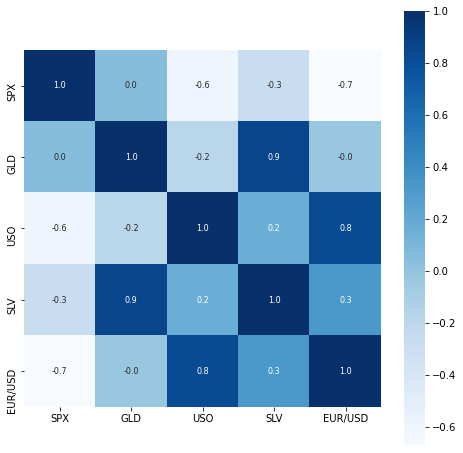

In [29]:
correlation = gold_dataset.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [27]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


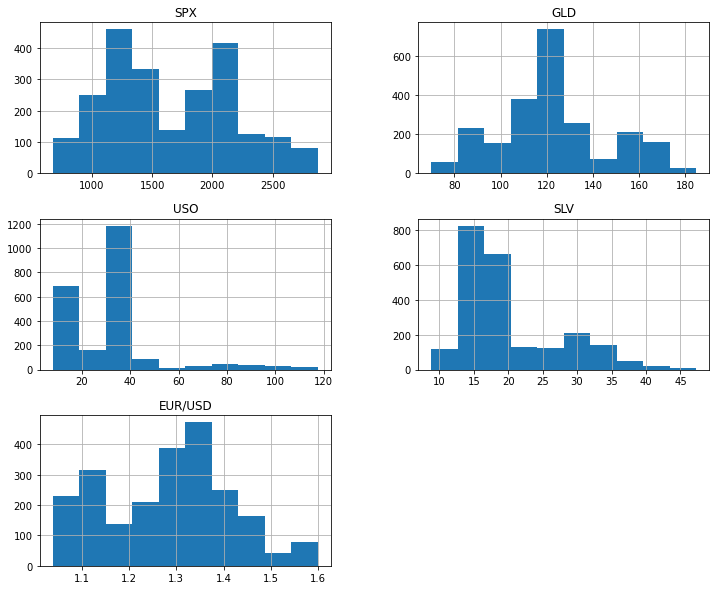

In [31]:
import matplotlib.pyplot as plt
gold_dataset.hist(figsize=(12,10));

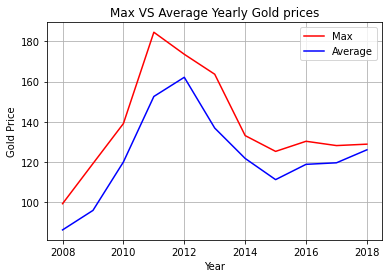

In [36]:
gold_dataset['Date'] = pd.to_datetime(gold_dataset['Date'])
gold_dataset['Year'] = pd.DatetimeIndex(gold_dataset['Date']).year

# plot Max VS Average yearly Gold prices

gold_dataset.groupby('Year').max()['GLD'].plot(color = 'red',label = 'Max')
gold_dataset.groupby('Year').mean()['GLD'].plot(color = 'blue',label = 'Average')
plt.ylabel('Gold Price')
plt.legend()
plt.title("Max VS Average Yearly Gold prices")
plt.grid()
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

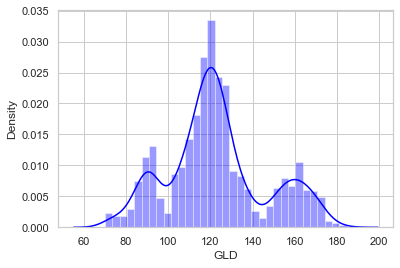

In [43]:
sns.distplot(gold_dataset['GLD'],color='blue')

In [44]:
X = gold_dataset.drop(['Date','GLD'],axis=1)
Y = gold_dataset['GLD']

In [45]:
print(X)

              SPX        USO      SLV   EUR/USD  Year
0     1447.160034  78.470001  15.1800  1.471692  2008
1     1447.160034  78.370003  15.2850  1.474491  2008
2     1411.630005  77.309998  15.1670  1.475492  2008
3     1416.180054  75.500000  15.0530  1.468299  2008
4     1390.189941  76.059998  15.5900  1.557099  2008
...           ...        ...      ...       ...   ...
2285  2671.919922  14.060000  15.5100  1.186789  2018
2286  2697.790039  14.370000  15.5300  1.184722  2018
2287  2723.070068  14.410000  15.7400  1.191753  2018
2288  2730.129883  14.380000  15.5600  1.193118  2018
2289  2725.780029  14.405800  15.4542  1.182033  2018

[2290 rows x 5 columns]


In [46]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [53]:
regressor = RandomForestRegressor(n_estimators=100)

In [54]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [55]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.38019915  82.33469999 114.59170016 127.37520082 121.15300022
 153.90669997 149.86949724 126.25010048 117.29939879 126.10539999
 115.97330127 172.19540083 140.6257976  167.7753987  115.18740059
 117.8455012  139.03980242 169.72410011 159.39680132 153.6105003
 155.12400019 123.48449961 175.71959862 157.10740327 125.12780024
  93.97010009  77.82710051 120.11470028 119.18470014 167.42319995
  88.11400086 125.4042997   91.03030053 117.52670074 120.87599965
 135.1026995  115.669501   115.3091006  144.88349835 107.42900077
 105.61810247  86.78849787 126.3066008  117.73280032 154.17619847
 119.97759999 109.0416992  107.75209819  93.21550021 127.17599759
  74.65370023 113.5891992  120.1234988  111.28989936 118.86359937
 120.23189981 160.06480136 165.41720135 146.75609738  86.33789964
  94.2046003   86.77019926  90.88309995 119.15100061 126.47340047
 127.64710053 168.64810009 122.36009937 117.7090988   98.19939997
 168.02600092 142.79559884 132.79860373 120.83800058 123.6759988
 119.6157007

In [57]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9907277549046597


In [58]:
Y_test = list(Y_test)

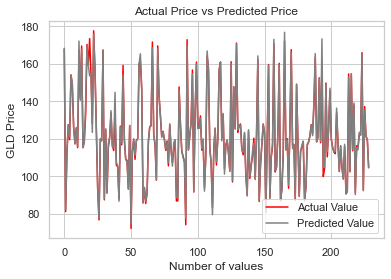

In [64]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='grey', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()